In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
plt.style.use('seaborn')
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, roc_curve, classification_report

<ipython-input-51-7f66a360c1c4>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
df=pd.read_csv('/content/Churn Modelling Dataset.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [ ]:
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("Duplicate Rows:")
    print(duplicates)
else:
    print("No duplicates found.")

Duplicate Rows:
       RowNumber  CustomerId    Surname  CreditScore Geography  Gender   Age  \
9999        9999    15682355  Sabbatini          772   Germany    Male  42.0   
10001      10000    15628319     Walker          792    France  Female  28.0   

       Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9999        3   75075.31              2        1.0             0.0   
10001       4  130142.79              1        1.0             0.0   

       EstimatedSalary  Exited  
9999          92888.52       1  
10001         38190.78       0  


In [ ]:
new_df =df.drop_duplicates()

In [ ]:
new_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [ ]:
new_df.shape

(10000, 14)

In [ ]:
new_df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(new_df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
data_df = new_df.dropna()

In [ ]:
print(data_df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
data_df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

<ipython-input-62-e40682532e0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9996 non-null   int64  
 1   Geography        9996 non-null   object 
 2   Gender           9996 non-null   object 
 3   Age              9996 non-null   float64
 4   Tenure           9996 non-null   int64  
 5   Balance          9996 non-null   float64
 6   NumOfProducts    9996 non-null   int64  
 7   HasCrCard        9996 non-null   float64
 8   IsActiveMember   9996 non-null   float64
 9   EstimatedSalary  9996 non-null   float64
 10  Exited           9996 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 937.1+ KB


In [ ]:
data_df.shape

(9996, 11)

In [ ]:
data_df["Age"] = data_df["Age"].astype(int)

<ipython-input-65-14f84e8ceca1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Age"] = data_df["Age"].astype(int)


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9996 non-null   int64  
 1   Geography        9996 non-null   object 
 2   Gender           9996 non-null   object 
 3   Age              9996 non-null   int64  
 4   Tenure           9996 non-null   int64  
 5   Balance          9996 non-null   float64
 6   NumOfProducts    9996 non-null   int64  
 7   HasCrCard        9996 non-null   float64
 8   IsActiveMember   9996 non-null   float64
 9   EstimatedSalary  9996 non-null   float64
 10  Exited           9996 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 937.1+ KB


In [ ]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,9996.0,650.503301,96.624668,350.00,584.00,652.00,717.2500,850.00
Age,9996.0,38.920968,10.488439,18.00,32.00,37.00,44.0000,92.00
Tenure,9996.0,5.013305,2.892353,0.00,3.00,5.00,7.2500,10.00
Balance,9996.0,76476.263216,62397.118820,0.00,0.00,97173.29,127639.3725,250898.09
NumOfProducts,9996.0,1.530212,0.581684,1.00,1.00,1.00,2.0000,4.00
HasCrCard,9996.0,0.705482,0.455849,0.00,0.00,1.00,1.0000,1.00
IsActiveMember,9996.0,0.514906,0.499803,0.00,0.00,1.00,1.0000,1.00
EstimatedSalary,9996.0,100106.701248,57513.314398,11.58,51002.11,100238.11,149400.1075,199992.48
Exited,9996.0,0.203782,0.402829,0.00,0.00,0.00,0.0000,1.00


In [ ]:
#EXPLORATORY DATA ANALYSIS (EDA)
# Defining color patettes
color_1 = sns.color_palette("deep",10)
color_2 = sns.color_palette("pastel",10)
color_3 = sns.color_palette("muted",10)
color_4 = sns.color_palette("bright",10)

0    7959
1    2037
Name: Exited, dtype: int64


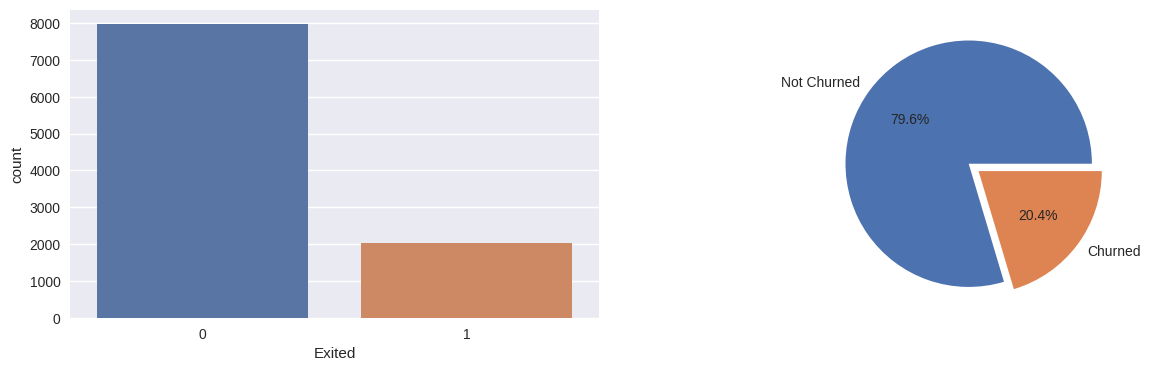

In [ ]:
# Creating insights for the exited column and visualization using the countplot for seaborn and pie plot.
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(x=df["Exited"],palette=color_1)

plt.subplot(1,2,2)
plt.pie(data_df["Exited"].value_counts(),explode=[0.0,0.1],labels=["Not Churned","Churned"],
        colors=color_1,autopct="%.01f%%")
print(data_df["Exited"].value_counts())

Exited  Geography
0       France       4201
        Spain        2063
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64


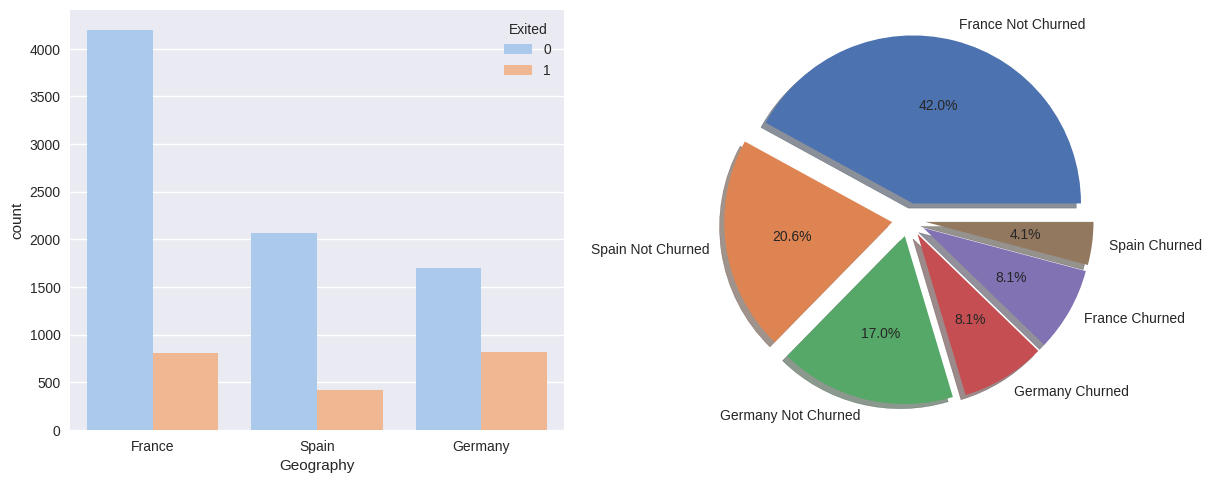

In [ ]:
label = ["France Not Churned","Spain Not Churned","Germany Not Churned","Germany Churned","France Churned","Spain Churned"]
explode = [0.1,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.countplot(data=data_df,x="Geography",hue="Exited",palette=color_2)
plt.subplot(2,2,2)
plt.pie(data_df.Geography.groupby(df.Exited).value_counts(),explode,shadow=True,colors=color_1,
        labels=label,autopct="%0.1f%%")


print(data_df.Geography.groupby(df.Exited).value_counts())

Exited  Gender
0       Male      4556
        Female    3403
1       Female    1139
        Male       898
Name: Gender, dtype: int64


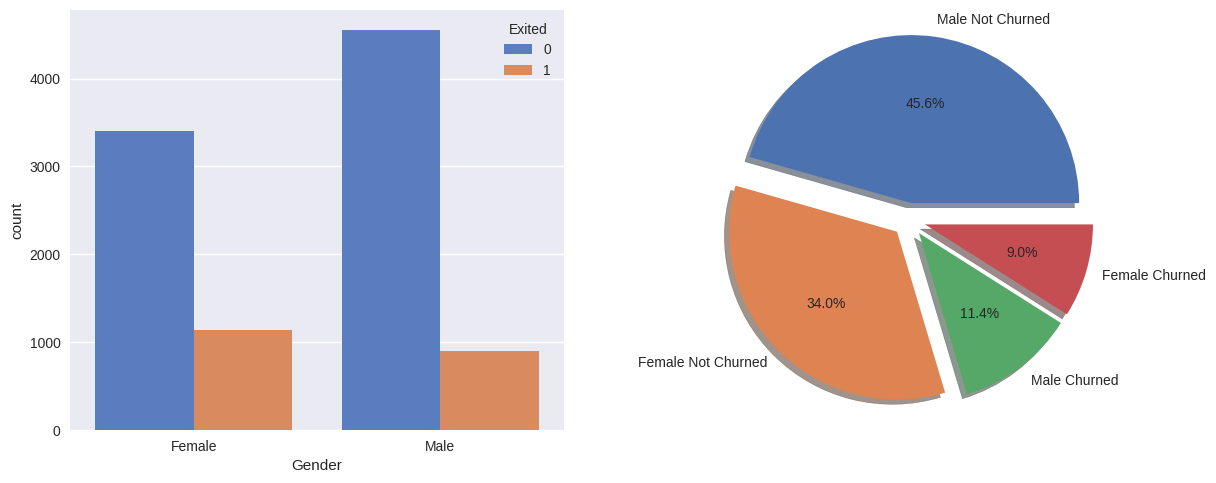

In [ ]:
label = ["Male Not Churned","Female Not Churned","Male Churned","Female Churned"]
explode = [0.1,0.1,0.1,0.1]
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.countplot(data=data_df, x="Gender",hue="Exited",palette=color_3)
plt.subplot(2,2,2)
plt.pie(data_df.Gender.groupby(data_df.Exited).value_counts(),explode,
        labels=label,colors=color_1,shadow=True,autopct="%0.1f%%")

print(data_df.Gender.groupby(df.Exited).value_counts())

Exited  NumOfProducts
0       2                4240
        1                3673
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: NumOfProducts, dtype: int64


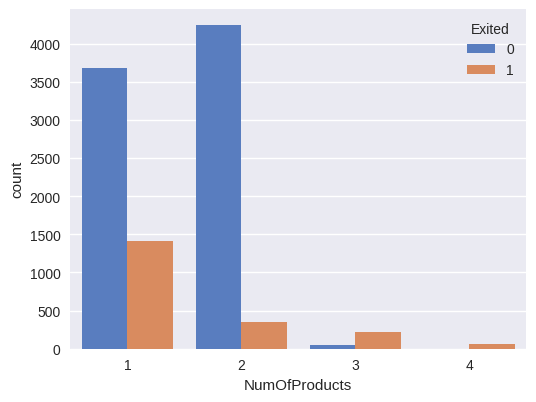

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.countplot(data=data_df,x="NumOfProducts",hue="Exited",palette=color_3)
print(data_df.NumOfProducts.groupby(data_df.Exited).value_counts())


Exited  HasCrCard
0       1.0          5628
        0.0          2331
1       1.0          1424
        0.0           613
Name: HasCrCard, dtype: int64


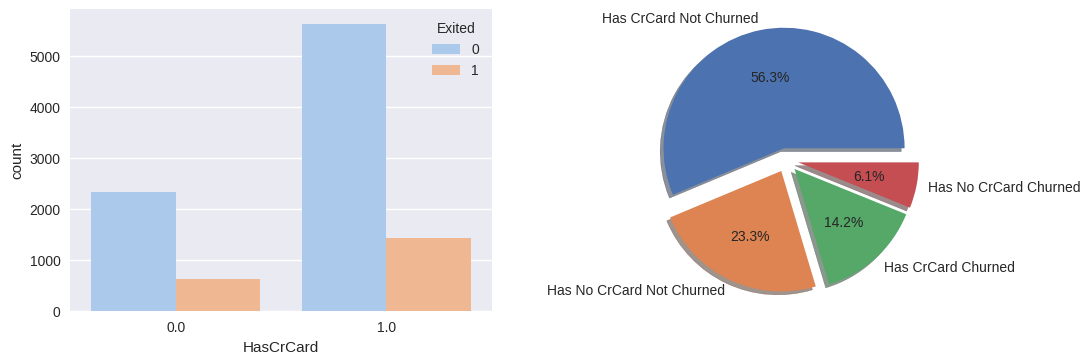

In [ ]:
label = ["Has CrCard Not Churned","Has No CrCard Not Churned","Has CrCard Churned","Has No CrCard Churned"]
explode = [0.1,0.1,0.1,0.1]
plt.figure(figsize=(25,18))
plt.subplot(4,4,1)
sns.countplot(data=data_df,x="HasCrCard",hue="Exited",palette=color_2)
plt.subplot(4,4,2)
plt.pie(data_df.HasCrCard.groupby(data_df.Exited).value_counts(),explode,
        labels=label,colors=color_1,shadow=True,autopct="%0.1f%%")
print(data_df.HasCrCard.groupby(data_df.Exited).value_counts())


Exited  IsActiveMember
0       1.0               4412
        0.0               3547
1       0.0               1302
        1.0                735
Name: IsActiveMember, dtype: int64


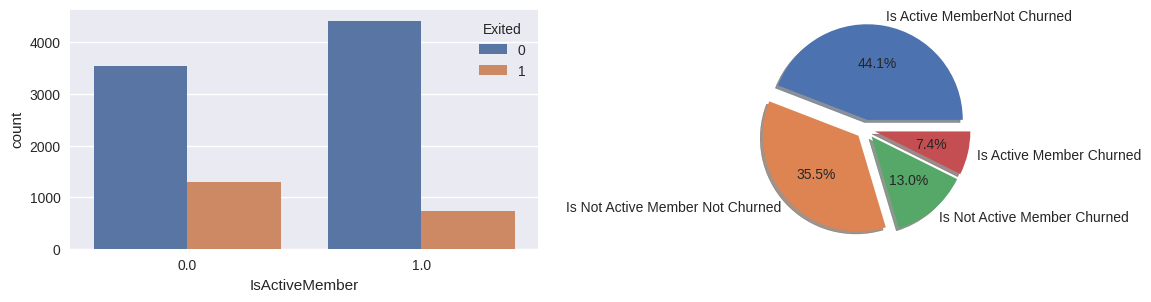

In [ ]:
label = ["Is Active MemberNot Churned","Is Not Active Member Not Churned","Is Not Active Member Churned","Is Active Member Churned"]
explode = [0.1,0.1,0.1,0.1]
plt.figure(figsize=(35,18))
plt.subplot(5,5,1)
sns.countplot(data=data_df,x="IsActiveMember",hue="Exited",palette=color_1)
plt.subplot(5,5,2)
plt.pie(data_df.IsActiveMember.groupby(data_df.Exited).value_counts(),explode,
        labels=label,colors=color_1,shadow=True,autopct="%0.1f%%")
print(data_df.IsActiveMember.groupby(data_df.Exited).value_counts())

<Axes: xlabel='Tenure', ylabel='count'>

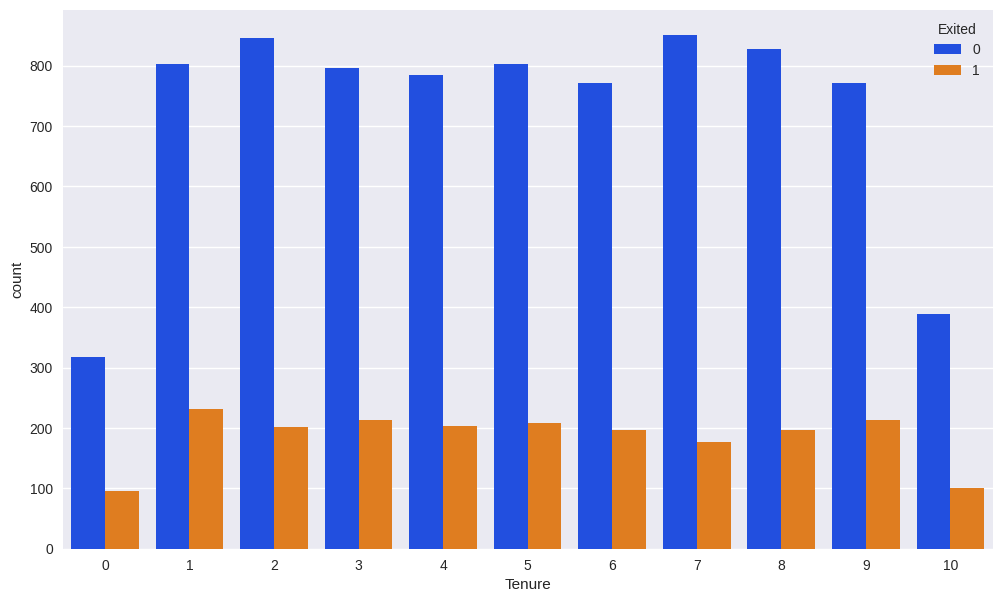

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data_df,x="Tenure",hue="Exited",palette=color_4)

**KMeans Clustering**

In [ ]:
data_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44,8,113755.78,2,1.0,0.0,149756.71,1


NORMALIZATION

In [ ]:
#Normalization can only be carried out on numerical values, so non-numerical (categorical) features will be dropped.

In [ ]:
data_df.drop(["Geography","Gender"],axis=1,inplace=True)

<ipython-input-78-711f87798dd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop(["Geography","Gender"],axis=1,inplace=True)


In [ ]:
data_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1.0,1.0,101348.88,1
1,608,41,1,83807.86,1,0.0,1.0,112542.58,0
2,502,42,8,159660.80,3,1.0,0.0,113931.57,1
3,699,39,1,0.00,2,0.0,0.0,93826.63,0
5,645,44,8,113755.78,2,1.0,0.0,149756.71,1


In [ ]:
# Since KMeans works based on the distance between points and since all the field vary widely in their ranges of value,
# It is necessary to convert the different columns to the same scale but applying normalization.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(data_df)
scaled_data_array = sc.transform(data_df)
scaled_data = pd.DataFrame(scaled_data_array, columns=data_df.columns)
scaled_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326054,0.293579,-1.041870,-1.225699,-0.911557,0.646119,0.970619,0.021599,1.976668
1,-0.439902,0.198231,-1.387627,0.117505,-0.911557,-1.547702,0.970619,0.216237,-0.505902
2,-1.536986,0.293579,1.032669,1.333214,2.526905,0.646119,-1.030270,0.240389,1.976668
3,0.501933,0.007535,-1.387627,-1.225699,0.807674,-1.547702,-1.030270,-0.109199,-0.505902
4,-0.056958,0.484275,1.032669,0.597486,0.807674,0.646119,-1.030270,0.863322,1.976668


In [ ]:
# Export data to CSV for submission purposes
scaled_data.to_csv('scaled_data.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

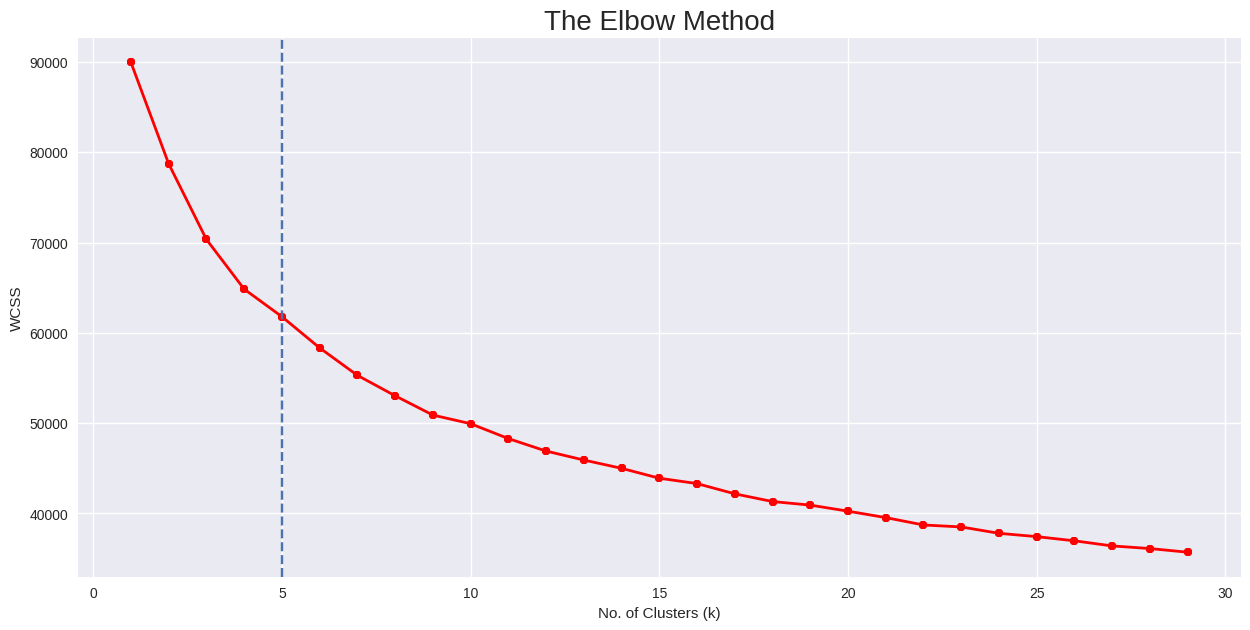

In [ ]:
# Running KMeans models to create chart for elbow method

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    KM = KMeans(i)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)
np.array(wcss)

fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [ ]:
# The next step is to create the model for creating clusters from the dataset.
# It is established that the optimal number of clusters is 5.
# the function fit_predict() will be employed intead of fit_transform() since we are using the unsupervised learning approach for this work.

In [ ]:
kms_model = KMeans(n_clusters=5)
kms_model.fit(scaled_data)
print(kms_model.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 3 2 ... 2 2 0]


As previously stated, now we have cluster labels availables based on KMeans model run. We don't really know what those cluster labels correspond to in real world. To explore if the KMeans labels have some correspondence with the real world labels that we had in the original data, I am adding the KMeans labels to the original data and query the data to draw correspondence with other categorical variables (primarily the Churn variable).

In [ ]:
# Next, I create a new column in the original data frame containing KMeans cluster labels

data_df['label_'] = kms_model.labels_

<ipython-input-85-ad0e44865658>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['label_'] = kms_model.labels_


In [ ]:
kms_model.cluster_centers_

array([[ 0.01559213, -0.37046901, -0.0046004 ,  0.73277787, -0.33634753,
         0.64611936,  0.01417272,  0.01547349, -0.50590184],
       [ 0.00232748, -0.36900179,  0.04773457, -1.15814644,  0.55760405,
         0.64512216, -0.01072578, -0.02523853, -0.48220459],
       [-0.0549358 ,  0.56859526, -0.02735208,  0.25258421, -0.12650443,
        -0.01880745, -0.32407361,  0.01792192,  1.97666803],
       [ 0.01806968, -0.33563738, -0.02570066, -0.04338081,  0.0279395 ,
        -1.54770166,  0.01133967,  0.01430208, -0.50245861],
       [ 0.02966571,  2.22398197,  0.02837787, -0.04623017, -0.05834704,
         0.08376881,  0.90501656, -0.08509933, -0.4800032 ]])

In [ ]:
data_df['label_'] = kms_model.labels_

<ipython-input-87-ae0085bd4980>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['label_'] = kms_model.labels_


In [ ]:
data_df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,label_
0,619,42,2,0.00,1,1.0,1.0,101348.88,1,2
1,608,41,1,83807.86,1,0.0,1.0,112542.58,0,3
2,502,42,8,159660.80,3,1.0,0.0,113931.57,1,2
3,699,39,1,0.00,2,0.0,0.0,93826.63,0,3
5,645,44,8,113755.78,2,1.0,0.0,149756.71,1,2
7,376,29,4,115046.74,4,1.0,0.0,119346.88,1,2
10,528,31,6,102016.72,2,0.0,0.0,80181.12,0,3
11,497,24,3,0.00,2,1.0,0.0,76390.01,0,1
12,476,34,10,0.00,2,1.0,0.0,26260.98,0,1
13,549,25,5,0.00,2,0.0,0.0,190857.79,0,3


In [ ]:
data_df.tail(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,label_
9990,714,33,3,35016.60,1,1.0,0.0,53667.08,0,0
9991,597,53,4,88381.21,1,1.0,0.0,69384.71,1,2
9992,726,36,2,0.00,1,1.0,0.0,195192.40,0,1
9993,644,28,7,155060.41,1,1.0,0.0,29179.52,0,0
9994,800,29,2,0.00,2,0.0,0.0,167773.55,0,3
9995,771,39,5,0.00,2,1.0,0.0,96270.64,0,1
9996,516,35,10,57369.61,1,1.0,1.0,101699.77,0,0
9997,709,36,7,0.00,1,0.0,1.0,42085.58,1,2
9998,772,42,3,75075.31,2,1.0,0.0,92888.52,1,2
10000,792,28,4,130142.79,1,1.0,0.0,38190.78,0,0


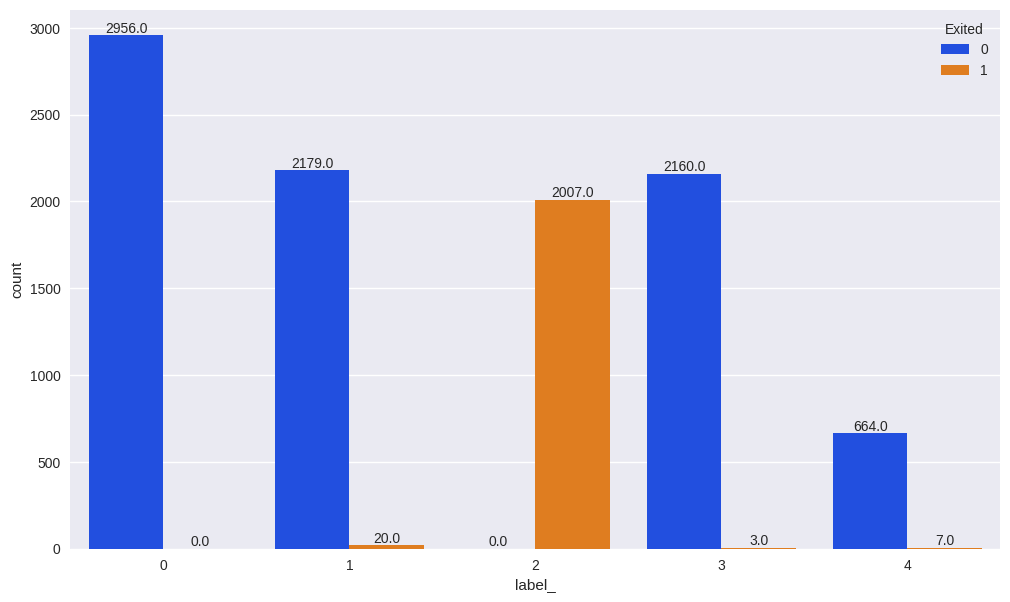

In [ ]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=data_df, x="label_", hue="Exited", palette=color_4)

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

# You can adjust fontsize and other annotation properties as needed
plt.show()

In [ ]:
# Exploring if KMeans labels have correlation with Churn field
print(data_df.query('label_==0 and Exited==1').CreditScore.count())
print(data_df.query('Exited==1').CreditScore.count())

0
2037


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in 'X'
n_clusters = 5  # Number of clusters

# Initialize K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit K-Means to your data
kmeans.fit(data_df)

# Predict cluster labels for your data points
cluster_labels = kmeans.labels_

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(data_df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.46


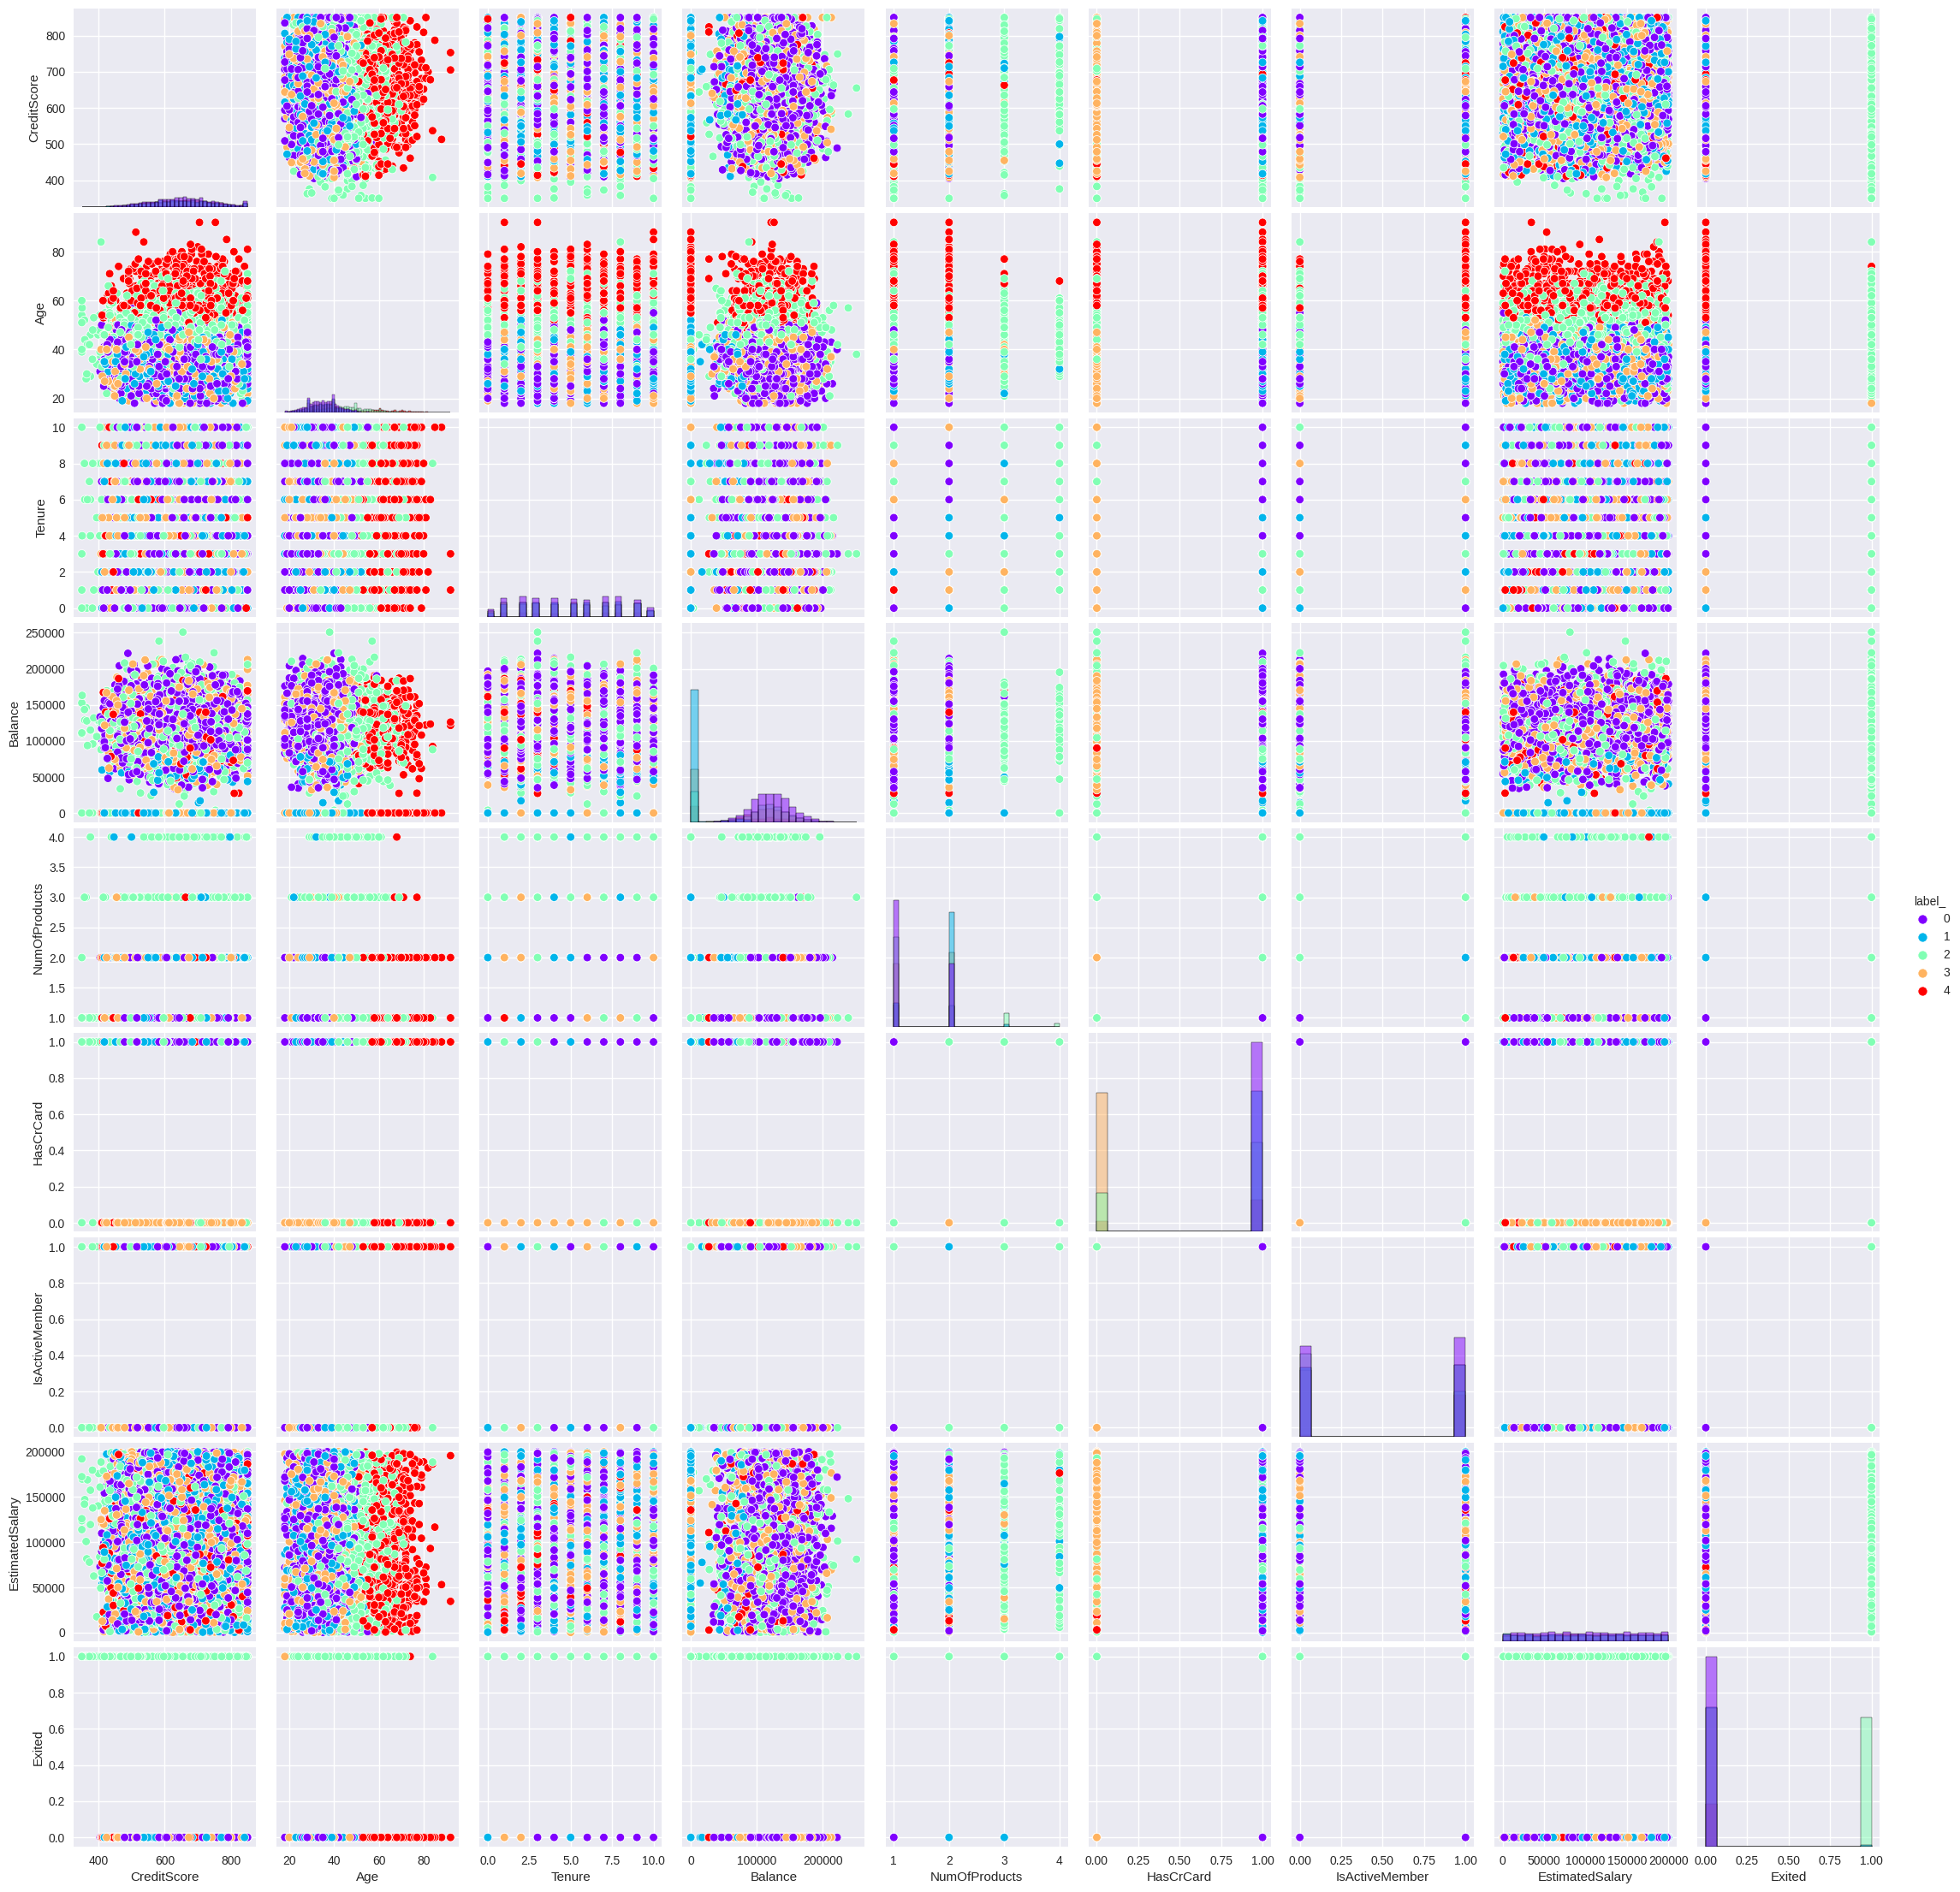

In [ ]:
sns.pairplot(data_df, hue='label_', diag_kind='hist', palette='rainbow')
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.utils import resample

k_fold_splits = 4
kf = StratifiedKFold(n_splits=k_fold_splits, random_state=42, shuffle=True)

models = {}
n_clusters = 5

for label_id in range(n_clusters):
    cluster_data = data_df[data_df['label_'] == label_id]
    X_cluster = cluster_data.drop(['Exited', 'label_'], axis=1)
    y_cluster = cluster_data['Exited']

    # Check class distribution within the cluster
    class_distribution = y_cluster.value_counts()

    # Skip if the class distribution is imbalanced
    if len(class_distribution) < 2:
        print(f"Skipping cluster {label_id} due to class imbalance.")
        continue

    # Perform k-fold cross-validation
    fold_index = 0
    for train_index, test_index in kf.split(X_cluster, y_cluster):
        X_train, X_test = X_cluster.iloc[train_index], X_cluster.iloc[test_index]
        y_train, y_test = y_cluster.iloc[train_index], y_cluster.iloc[test_index]

        model = LogisticRegression(random_state=42)
        model.fit(X_train, y_train)

        # Store the model for this cluster and fold
        if label_id not in models:
            models[label_id] = []
        models[label_id].append(model)

        fold_index += 1
     # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Cluster {label_id} - Accuracy: {accuracy}")
    print("Classification Report:\n", classification_rep)

Skipping cluster 0 due to class imbalance.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Cluster 1 - Accuracy: 0.9908925318761385
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       544
           1       0.00      0.00      0.00         5

    accuracy                           0.99       549
   macro avg       0.50      0.50      0.50       549
weighted avg       0.98      0.99      0.99       549

Skipping cluster 2 due to class imbalance.
Cluster 3 - Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       540

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540

Cluster 4 - Accuracy: 0.9940119760479041
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       166
           1       0.00      0.00      0.00         1

    accuracy 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


It seems like you have clusters (cluster 0 and cluster 2) where the class distribution is imbalanced, and some of the folds generated by StratifiedKFold have classes with fewer than 2 members.

When working with highly imbalanced clusters or classes, there are several approaches you can consider:

Oversampling: If you have clusters with imbalanced classes, you can oversample the minority class to balance the class distribution. The code I provided in my previous response already includes oversampling for each cluster, but you might need to adjust the oversampling ratio or method depending on your data.

Undersampling: Alternatively, you can undersample the majority class to balance the class distribution. This can be particularly useful if you have a very large dataset.

Synthetic Data Generation: You can use techniques like Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for the minority class.

Collect More Data: If possible, collect more data for clusters with imbalanced classes to balance the distribution naturally.

Use Different Models: Consider using models that are more robust to class imbalance, such as ensemble methods like Random Forest or Gradient Boosting.

Stratified Sampling: Ensure that you use a stratified sampling approach when splitting your data into training and testing sets, which helps maintain class proportions in both sets.

Adjust Evaluation Metrics: When evaluating models trained on imbalanced data, use appropriate evaluation metrics such as precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC-AUC) curve, rather than accuracy.

The choice of which method to use depends on your specific dataset and problem domain. Keep in mind that handling class imbalance is an important aspect of working with imbalanced data, and the appropriate approach may vary from one situation to another.


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Define the number of folds
k_fold_splits = 4
kf = StratifiedKFold(n_splits=k_fold_splits, random_state=42, shuffle=True)

# Initialize an empty list to store the model's performance metrics
accuracy_scores = []

# Loop through each fold
for train_index, test_index in kf.split(X_cluster, y_cluster):
    X_train, X_test = X_cluster.iloc[train_index], X_cluster.iloc[test_index]
    y_train, y_test = y_cluster.iloc[train_index], y_cluster.iloc[test_index]

    # Calculate the number of samples in the minority class
    minority_class_samples = sum(y_train == 1)

    # Determine an appropriate value for k_neighbors (e.g., half of minority class samples)
    k_neighbors = minority_class_samples // 2


    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance (e.g., accuracy)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the mean accuracy across folds
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy}")


Mean Accuracy: 0.9895744225834047


In [ ]:
cluster_mean_accuracies = []

# Loop through each cluster
for label_id in range(n_clusters):
    cluster_data = data_df[data_df['label_'] == label_id]
    X_cluster = cluster_data.drop(['Exited', 'label_'], axis=1)
    y_cluster = cluster_data['Exited']

    # Check class distribution within the cluster
    class_distribution = y_cluster.value_counts()

    # Skip if the class distribution is imbalanced
    if len(class_distribution) < 2:
        print(f"Skipping cluster {label_id} due to class imbalance.")
        continue


    # Calculate and store the mean accuracy for the current cluster
    mean_accuracy = np.mean(accuracy_scores)
    cluster_mean_accuracies.append(mean_accuracy)

# Calculate the mean accuracy across all clusters
mean_accuracy_across_clusters = np.mean(cluster_mean_accuracies)

# Print the mean accuracy across all clusters
print(f"Mean Accuracy across {n_clusters} clusters: {mean_accuracy_across_clusters:.2f}")

Skipping cluster 0 due to class imbalance.
Skipping cluster 2 due to class imbalance.
Mean Accuracy across 5 clusters: 0.99
